<a href="https://colab.research.google.com/github/ShaimaM/Intro_to_ML/blob/main/Seattle_rain_predictionW1_d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Rain in Seattle
Seattle is one of the rainiest places in the world. Even so, it is worth asking the question 'will it rain tomorrow.' Imagine you are headed to sleep at a hotel in downtown Seattle. 

The next days activities are supposed to include walking around outside most of the day. You want to know if it will rain or not (you don't really care how much rain just a simple yes or no will do), which will greatly impact what you choose to wear and carry around (like an umbrella). 


Build a heuristic model to predict if it will rain tomorrow.



## Our Data

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv')

df

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [ ]:
import numpy as np

# what % of days did it rain?
df['rain'].loc[df['rain']== True].count()/ len(df)


0.4265977848225118

In [ ]:
# what values are seen in the prcp column
df['prcp'].value_counts()

0.00    14648
0.01      933
0.02      707
0.03      493
0.04      428
        ...  
2.49        1
2.18        1
2.20        1
2.70        1
2.95        1
Name: prcp, Length: 207, dtype: int64

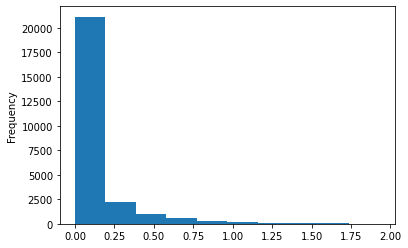

In [ ]:
# show me a histogram of prcp < 2

df['prcp'].loc[df['prcp'] < 2].plot.hist() 

#### Check for Missing Values and Outliers

In [ ]:
# how many null values does each column have?

df.isnull().sum()

ds      0
prcp    3
tmax    0
tmin    0
rain    3
dtype: int64

In [ ]:
# show me the null rows

df.loc[df.isnull().any(axis=1)]

,ds,prcp,tmax,tmin,rain
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [ ]:
# drop the null rows and update the dataframe

df1=df.dropna()
df1

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


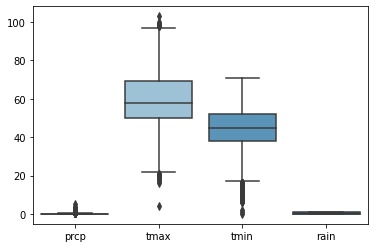

In [ ]:
import seaborn as sns

# make a box plot

sns.boxplot(data=df1,palette="Blues")


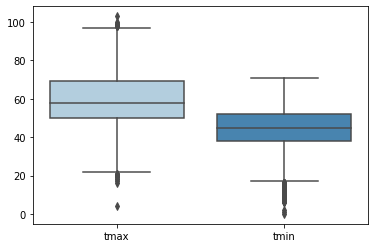

In [ ]:
# show me some outler values from tmax or tmin

sns.boxplot(data=df1[['tmax', 'tmin']],palette="Blues")


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


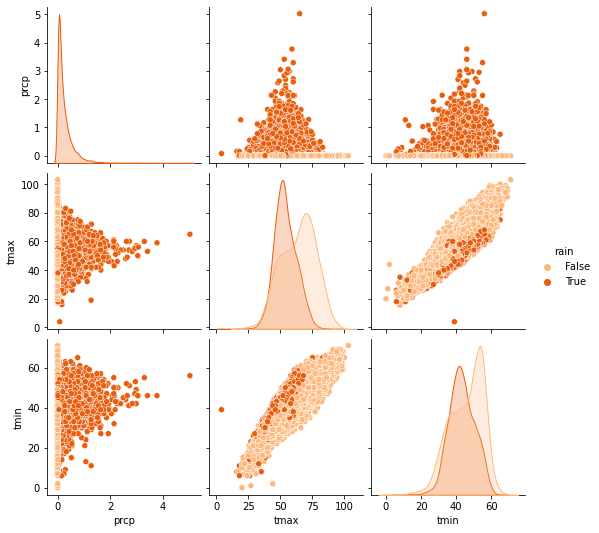

In [ ]:
# make an sns pairplot with hue='rain'

sns.pairplot(data=df1, hue='rain', palette="Oranges")

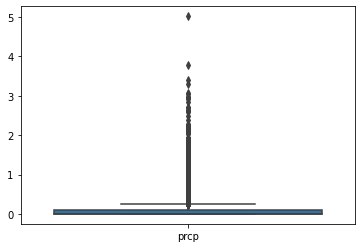

In [ ]:
# bonus challenge
# plot prcp by day (ds on x axis)

sns.boxplot(data=df1[['prcp']])

## Set up a basic model to make predicitons

First, split the data...

In [ ]:
from sklearn.model_selection import train_test_split

X = df1[['prcp', 'tmax', 'tmin']]  # all the values you want to help predict the target value
y = df1.rain.astype(np.int32)  # the target value

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Bring in a model now...

In [ ]:
from sklearn.linear_model import LogisticRegression

# logistic regression is a classifier, for our case, True (1) or False (0)
lr = LogisticRegression()

lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predict the y values from X test data
lr.predict(X_test)

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

In [ ]:
preds = lr.predict(X_test)

In [ ]:
# how'd your model score?

np.mean(y_test == preds)

0.9258969341161122